In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# Construct labelling specification

This function makes it easy to assign different labellers to different factors. The labeller can be a function or it can be a named character vectors that will serve as a lookup table.
```R
labeller(
  ...,
  .rows = NULL,
  .cols = NULL,
  keep.as.numeric = NULL,
  .multi_line = TRUE,
  .default = label_value
)
```

**Arguments**  
`...`	
Named arguments of the form variable = labeller. Each labeller is passed to as_labeller() and can be a lookup table, a function taking and returning character vectors, or simply a labeller function.

`.rows`, `.cols`	
Labeller for a whole margin (either the rows or the columns). It is passed to as_labeller(). When a margin-wide labeller is set, make sure you don't mention in ... any variable belonging to the margin.

`keep.as.numeric`	
Deprecated. All supplied labellers and on-labeller functions should be able to work with character labels.

`.`multi_line	
Whether to display the labels of multiple factors on separate lines. This is passed to the labeller function.

`.default`	
Default labeller for variables not specified. Also used with lookup tables or non-labeller functions.



**Value**  
A labeller function to supply to `facet_grid()` or `facet_wrap()` for the argument labeller.

# Example

In [4]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()


[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [5]:
tips <- read.csv('./tips.csv')
head(tips)

X,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


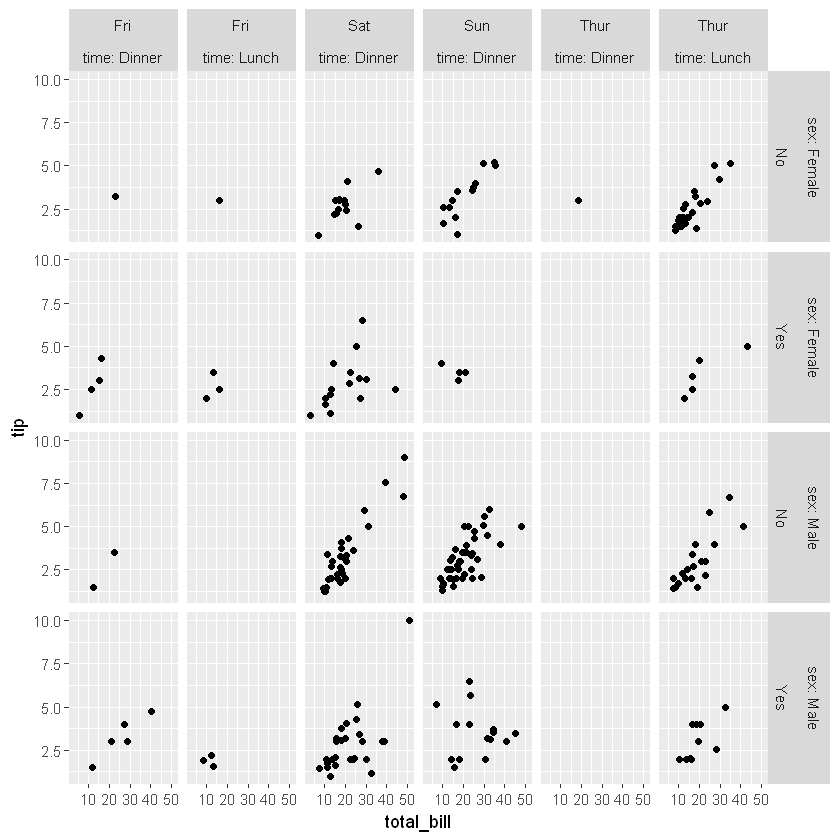

In [6]:
plot <- ggplot(tips, aes(total_bill, tip)) + geom_point()

plot +
facet_grid(sex + smoker ~ day + time, 
           labeller = labeller(sex = label_both,
                               smoker = label_value,
                               day = label_value,
                               time = label_both))

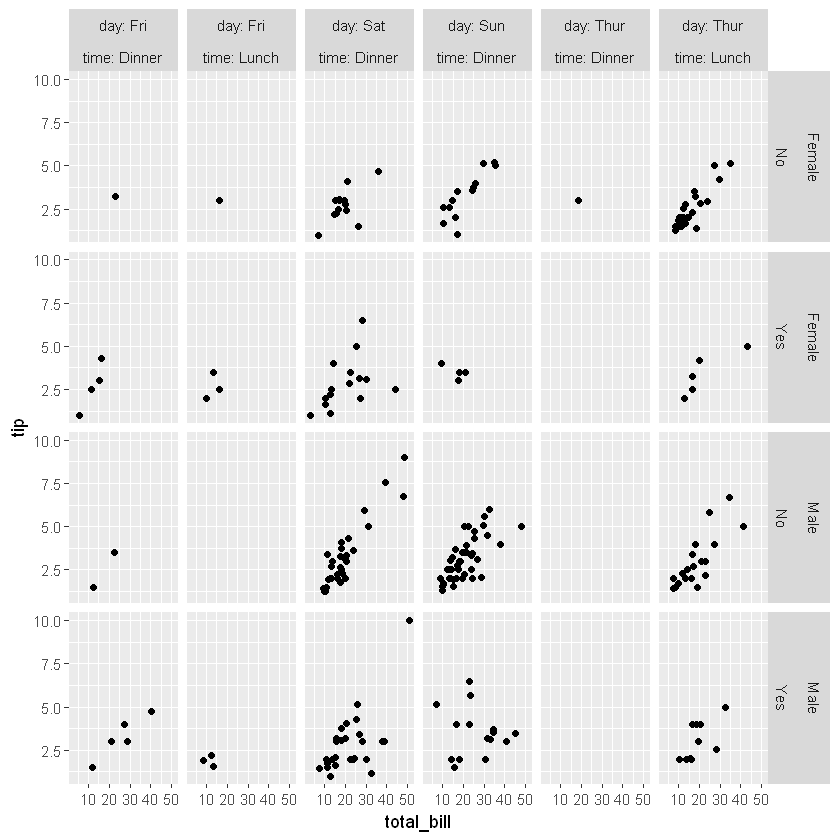

In [7]:
# Or whole margins:
plot + 
facet_grid(sex + smoker ~ day + time,
           labeller = labeller(.rows = label_value,  #using label_value for strips of row
                               .cols = label_both))  #using label_both for strips of column

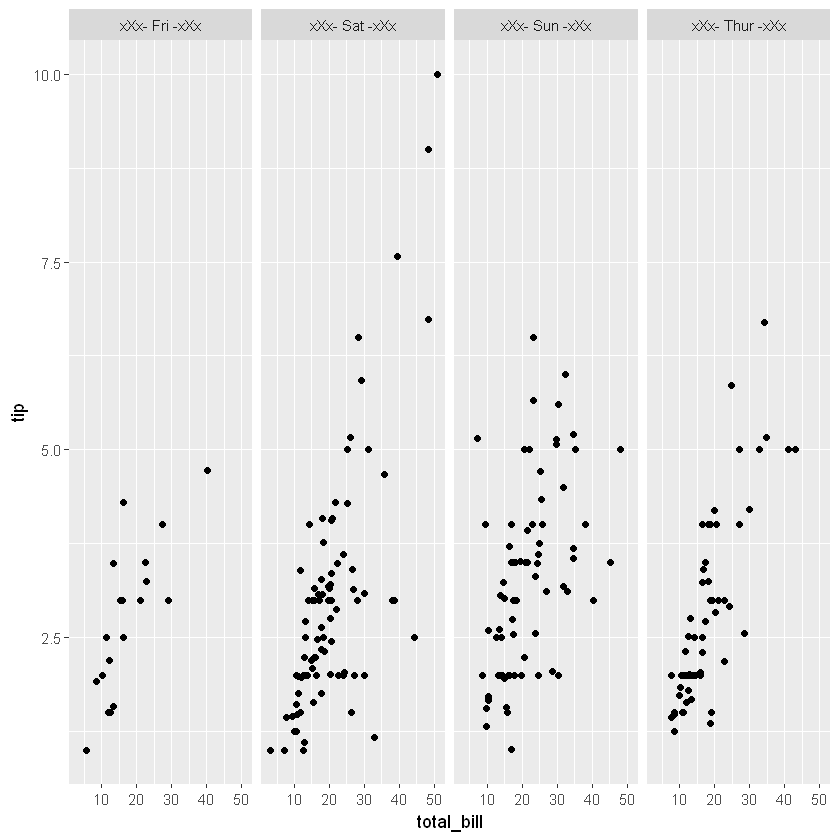

In [10]:
# You can supply functions operating on strings:
decorate <- function(labels) paste('xXx-', labels, '-xXx')

plot + 
facet_grid(. ~ day, labeller = labeller(day = decorate))

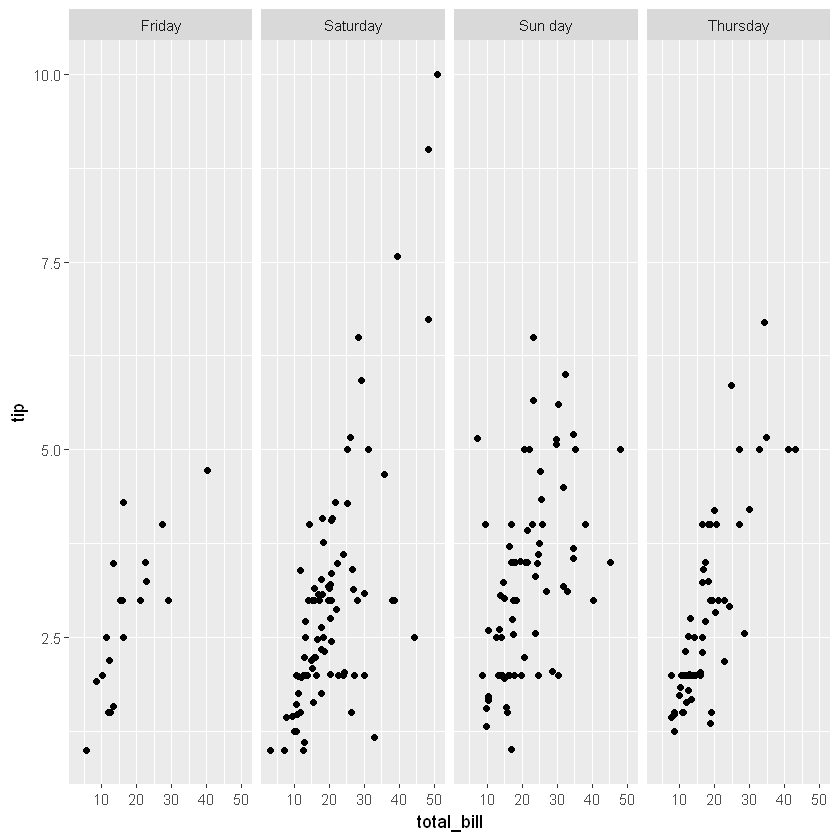

In [16]:
# Or use character vectors as lookup tables:
mapping <- c(
    Thur = 'Thursday',
    Fri = 'Friday',
    Sat = 'Saturday',
    Sun = 'Sunday'
)

plot + 
#mapping each value in column `day` of data frame `tips`
#for value that are not a key in mapping, default: using decorate function
facet_grid(. ~ day, labeller = labeller(day = mapping))

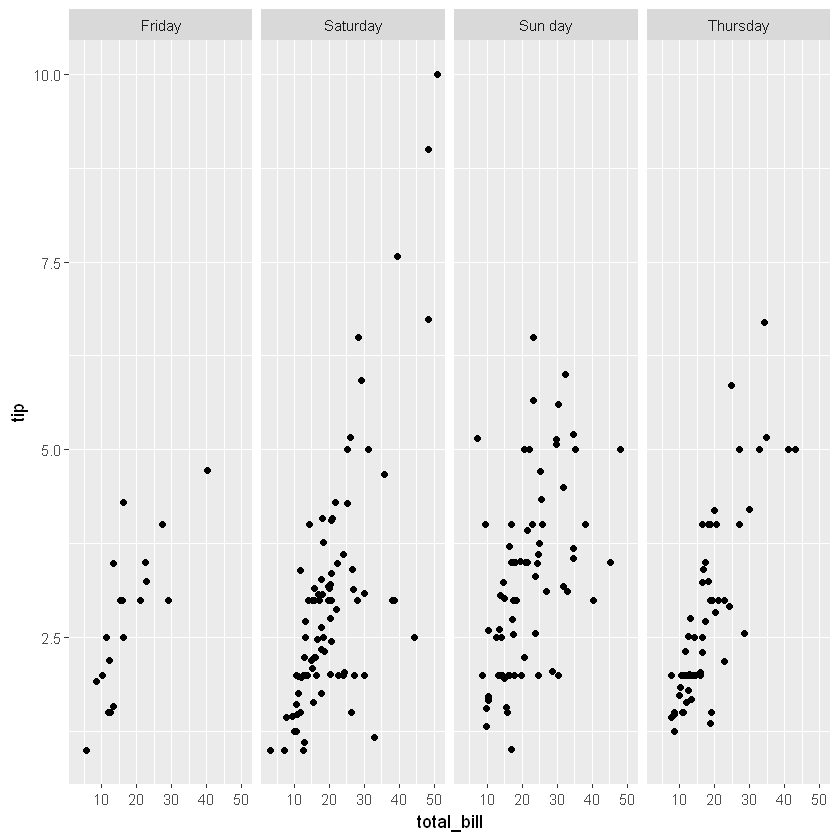

In [19]:
plot + 
facet_grid(. ~ day, labeller = labeller(day = mapping))

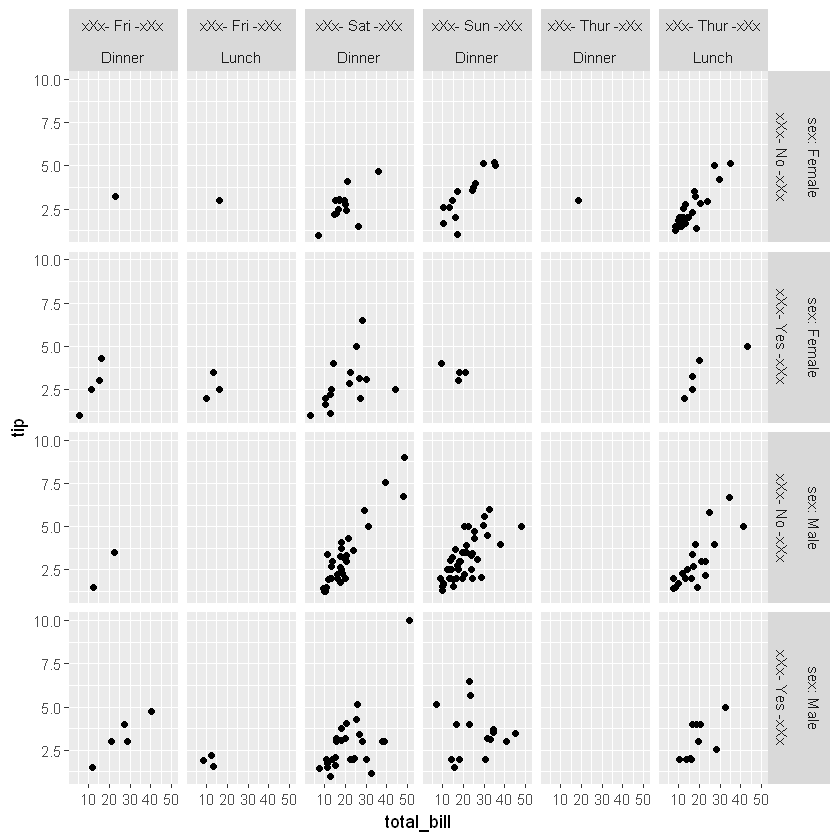

In [20]:
plot + 
facet_grid(sex + smoker ~ day + time, 
           labeller = labeller(sex = label_both,    #using `label_both` for strip of variable `sex`
                               time = label_value,  #using `label_value` for strip of variable `time`
                               .default = decorate))#default, using `decorate` function, work like SWITCH in Javascript

In [25]:
# labeller() is especially useful to act as a global labeller. You
# can set it up once and use it on a range of different plots with
# different facet specifications.

global_labeller <- labeller(
    day = mapping,
    .default = decorate
)

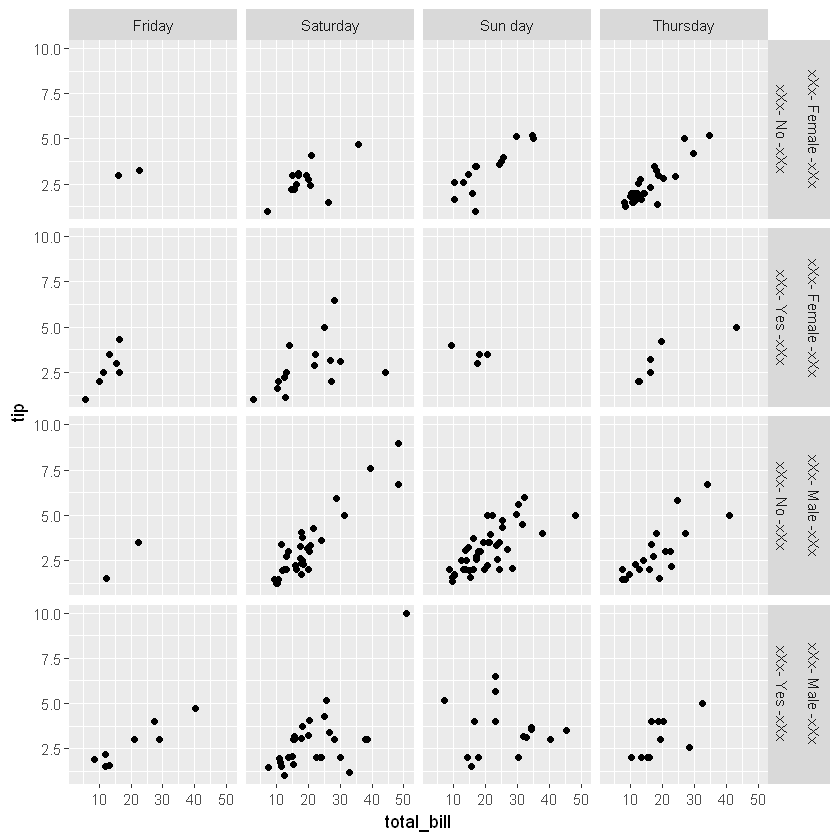

In [27]:
plot + 
facet_grid(sex + smoker ~ day, labeller = global_labeller)

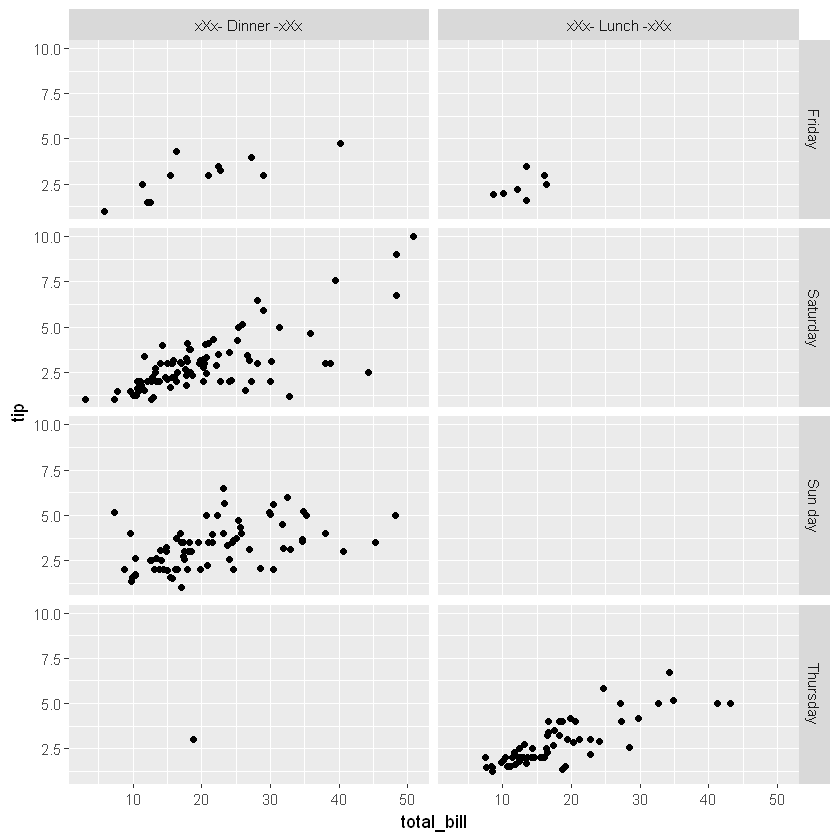

In [29]:
plot + 
facet_grid(day ~ time, labeller = global_labeller)

In [30]:
?as_labeller